In [ ]:
!pip install -qr /content/drive/MyDrive/MajorProj/cnn_yolo/yolov5/requirements.txt


     |████████████████████████████████| 596 kB 8.4 MB/s 


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import cv2
import torch
from IPython.display import Image, clear_output
import os
from google.colab.patches import cv2_imshow

import tensorflow as tf
%tensorflow_version 2.6
import numpy as np
import cv2
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.6`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
orginalImagePath="/content/Symptoms-of-early-blight-on-leaves-of-tomato.png"

## Use the defined methods

## Use the defined methods

In [ ]:
def labelImageAndReturnLabelFile(imagePath):
  #detect label
  res = !python /content/drive/MyDrive/MajorProj/cnn_yolo/yolov5/detect.py --save-txt --weights /content/drive/MyDrive/MajorProj/cnn_yolo/model.pt --source '{imagePath}' --img 416 --conf 0.4
  #grab ouptut label path
  labelOp='/content/'+res[-1].split()[-1]+'/'
  textFileWithDimension=""
  for root, dirs, files in os.walk(labelOp):
      for file in files:
          if file.endswith('.txt'):
              print(file)
              textFileWithDimension=f'{labelOp}{file}'
              break;
  return textFileWithDimension

In [ ]:

def convertYoloCoordinateToOpenCv(imagePath,yoloTextFile):
  img = cv2.imread(imagePath)
  dh, dw, _ = img.shape

  fl = open(yoloTextFile,"r")
  data = fl.readlines()
  fl.close()

  for dt in data:

      # Split string to float
      _, x, y, w, h = map(float, dt.split(' '))
      l = int((x - w / 2) * dw)
      r = int((x + w / 2) * dw)
      t = int((y - h / 2) * dh)
      b = int((y + h / 2) * dh)
      
      if l < 0:
          l = 0
      if r > dw - 1:
          r = dw - 1
      if t < 0:
          t = 0
      if b > dh - 1:
          b = dh - 1

      cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
      return (l,t,r,b)


In [ ]:
def extractImagePart(orginalImage,l,t,r,b):
  orginal=cv2.imread(orginalImage)
  cropped_img = orginal[t:b,l:r]
  return cropped_img

In [ ]:
DISEASE_ARRAY=['Early_blight', 'healthy',"bacterial",'YellowLeaf_Curl_Virus']
model_loaded=tf.keras.models.load_model("/content/drive/MyDrive/MajorProj/models/croppedNew60EpcohDivide255")

In [ ]:
model_loaded

In [ ]:
#While building you can just put this in post request
def predictDisease(imgSource,imageArray,isProvidedImageArray):
  if(isProvidedImageArray):
    image=imageArray
  else:
    image=cv2.imread(imgSource)      

  newImage=cv2.resize(image,(256,256))
  #cv2_imshow(newImage)
  newImage=np.expand_dims(newImage,0)
 
  prediction=model_loaded.predict(newImage)
  return (DISEASE_ARRAY[np.argmax(prediction[0])],np.amax(prediction[0]))

In [ ]:
def labelImageWithDiseaseName(labelFilePath,diseaseList,imagePath):
  img = cv2.imread(imagePath)
  dh, dw, _ = img.shape

  fl = open(labelFilePath,"r")
  data = fl.readlines()
  fl.close()

  for dt in data:

      # Split string to float
      _, x, y, w, h = map(float, dt.split(' '))
      l = int((x - w / 2) * dw)
      r = int((x + w / 2) * dw)
      t = int((y - h / 2) * dh)
      b = int((y + h / 2) * dh)
      
      if l < 0:
          l = 0
      if r > dw - 1:
          r = dw - 1
      if t < 0:
          t = 0
      if b > dh - 1:
          b = dh - 1

      cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
      cv2.putText(img, diseaseList, (l, t+15), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255,0,0), 1)
  return img
  # plt.imshow(img)
  # plt.show()
      



## Use the defined methods

In [ ]:
labelledFile = labelImageAndReturnLabelFile(orginalImagePath)
print(labelledFile)

Symptoms-of-early-blight-on-leaves-of-tomato.txt
/content/drive/MyDrive/MajorProj/cnn_yolo/yolov5/runs/detect/exp1694/labels/Symptoms-of-early-blight-on-leaves-of-tomato.txt


In [ ]:
(l,t,r,b)=convertYoloCoordinateToOpenCv(orginalImagePath,labelledFile)


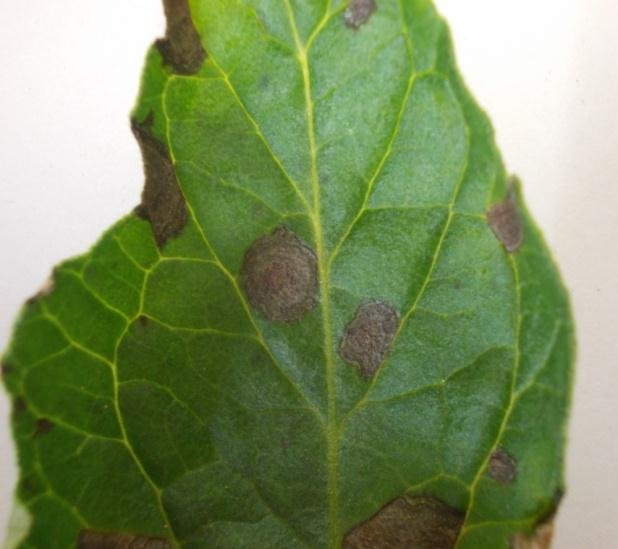

In [ ]:
cropped=extractImagePart(orginalImagePath,l,t,r,b)
cv2_imshow(cropped)


In [ ]:
type(cropped)

numpy.ndarray

In [ ]:
# predictDisease(orginalImagePath,isProvidedImageArray=False,imageArray="")

In [ ]:
finalPrediction,finalA=predictDisease(imageArray=cropped,isProvidedImageArray=True,imgSource="")
print(finalPrediction)

bacterial


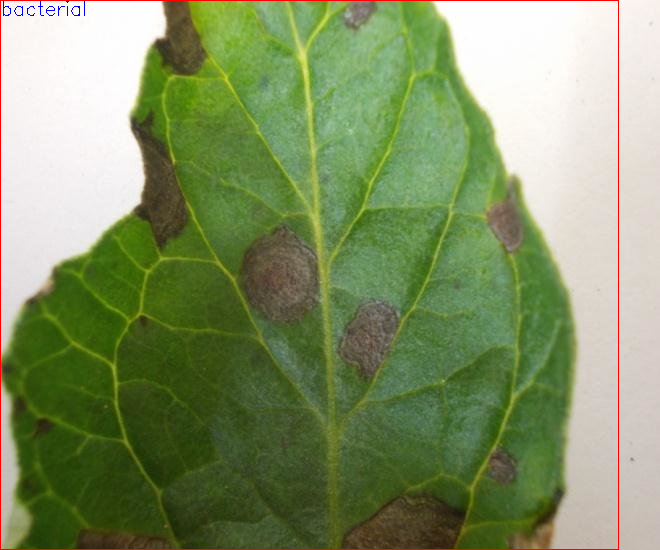

In [ ]:
from google.colab.patches import cv2_imshow
labelled=labelImageWithDiseaseName(labelFilePath=labelledFile,diseaseList=finalPrediction,imagePath=orginalImagePath)

cv2_imshow(labelled)


# Flask

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import numpy as np

              

In [ ]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null &&echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list &&sudo apt update && sudo apt install ngrok   
              

In [ ]:
# !ngrok authtoken 27t8rWzzaxRrEbnxn3cGGtKcp1B_7h4RRR5CxVVAaLPwSoXTM

In [ ]:
!ngrok config add-authtoken <auth token>

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from distutils.log import debug
from flask import Flask, render_template,request
import cv2
import base64
import cv2

app = Flask(__name__,static_folder="/content/drive/MyDrive/MajorProj/cnn_yolo/flask/static",template_folder='/content/drive/MyDrive/MajorProj/cnn_yolo/flask/templates')
run_with_ngrok(app)

@app.route('/',methods=['GET'])
def plant():
    return render_template('index.html')

@app.route('/',methods=['POST'])
def predict():
    imagefile = request.files['imagefile']
    image_path = "/content/drive/MyDrive/MajorProj/cnn_yolo/flask/static/"+imagefile.filename
    
    supply_image_path="./static/"+imagefile.filename
    imagefile.save(image_path)
   
    try:
      labelledFile = labelImageAndReturnLabelFile(image_path)
      (l,t,r,b)=convertYoloCoordinateToOpenCv(image_path,labelledFile)
      cropped=extractImagePart(image_path,l,t,r,b)
      orgPred,orgAcc=predictDisease(image_path,isProvidedImageArray=False,imageArray="")
      finalPrediction,finalAcc=predictDisease(imageArray=cropped,isProvidedImageArray=True,imgSource="")
      print(orgPred)
      print(finalPrediction)

      labelledImage=labelImageWithDiseaseName(labelFilePath=labelledFile,diseaseList=orgPred,imagePath=image_path)
      
      resultPath="/content/drive/MyDrive/MajorProj/cnn_yolo/flask/static/modified"+imagefile.filename
      supply_result_path="./static/modified"+imagefile.filename
      print(resultPath)
      cv2.imwrite(resultPath, labelledImage)

      solution=""
      
      if orgPred=="Early_blight":
          solution="Use Bonide liquid copper fungicide concentrate or Bonide tomato & vegetable thoroughly spray the plant(bottom of leaves also) also we can use CEASE Biological fungicide   in every 3 days Reapply  7 to 14 days  in every 3 days "
      elif orgPred=="YellowLeaf_Curl_Virus":
          solution="Use Imidacloprid spray below leaves in every 14-21 days and Rotate you plant on a monthly basis  with Abamectin it is    Effective when used early in morning or late in evening .i.e. Before sun or after sun"
      else:
          solution="Tomato is healthy :)"
    except:
      return render_template('index.html',prediction="Hello world",className="No Leaf Detected")


    return render_template('index.html',prediction="Hello world",orginalImage = supply_image_path,modifiedImage=supply_result_path,suggestedSolution=solution,confidence=orgAcc*100,className=orgPred)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c235-34-125-113-11.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [16/Apr/2022 17:48:50] "GET /robots.txt HTTP/1.1" 404 -
127.0.0.1 - - [16/Apr/2022 17:48:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Apr/2022 17:48:52] "GET /favicon.ico HTTP/1.1" 404 -
